In [156]:
import os
import sys
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
from scipy.stats import pearsonr
import toolsets.spectra_operations as so
from toolsets.file_io import get_file_list, readin_peak_list, prepare_sample_list
from toolsets.ff_droup import process_mzml, get_EIC_list, EIC
from toolsets.feature_alignment import initilize_pmz_rt_list, find_feature, find_istd, clean_bad_features
from feature_normalization.rt_normalization import rt_normalization
from tqdm import tqdm
import seaborn as sns
from toolsets.biodata import find_edge, biodata_prep
import matplotlib.pyplot as plt
import toolsets.ff_droup as ff
# from toolsets.feature_alignment import
from toolsets.search import quick_search_values, string_search
# from feature_finding.feature_finding_alphapept import find_feature

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
peak_list_dir = '/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230607_NQ_Development_H2Lv2/peak_list/pos'
# istd_info = pd.read_csv(os.path.join('/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230607_NQ_Development_H2Lv2', 'istd_info.csv'))
mzml_dir ='/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230607_NQ_Development_H2Lv2/mzml/pos'
alignment_dir = '/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230607_NQ_Development_H2Lv2/alignment_result/pos'
normalized_dir ='/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230607_NQ_Development_H2Lv2/normalized_peak_list/pos'
bio_dir = '/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230607_NQ_Development_H2Lv2/bioactivity/pos'
result_dir = '/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230607_NQ_Development_H2Lv2/results'
sirius_input_dir = '/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230607_NQ_Development_H2Lv2/sirius_compitable'

In [35]:
all_lst = get_file_list(peak_list_dir, '.txt')
fractions, qcs, blks = prepare_sample_list(all_lst)

In [256]:
rt_seed =qcs[0]

In [258]:
rt_report, intensity_report = rt_normalization(all_lst, rt_seed, istd_info, peak_list_dir, normalized_dir)

100%|██████████| 64/64 [20:25<00:00, 19.15s/it]


In [262]:
rt_report.to_csv(os.path.join(results_dir, 'rt_report.csv'), index = False)
intensity_report.to_csv(os.path.join(results_dir, 'intensity_resport.csv'), index = False)

# Alignment

In [263]:
from toolsets.feature_alignment import initilize_pmz_rt_list, find_feature, find_istd, clean_bad_features, align

In [438]:
master_list = initilize_pmz_rt_list([os.path.join(normalized_dir, x+'.csv') for x in qcs], mode = 'inclusive')

length_of_master list:  21797


100%|██████████| 21244/21244 [01:27<00:00, 242.06it/s]

length_of updated master list:  66067


In [486]:

alignnn = align([os.path.join(normalized_dir, x+'.csv') for x in all_lst], master_list)


100%|██████████| 64/64 [09:09<00:00,  8.58s/it]


In [489]:
alignment = alignnn.copy()

In [490]:
alignment_istd = find_istd(alignment, istd_info)
alignment_istd = string_search(alignment_istd, 'isotopic_state', 'M + 0')
alignment_istd.drop(['isotopic_state'], axis = 1, inplace = True)
alignment_istd_cleaned = filter_with_blank(alignment_istd, qc_labes=qcs, blank_labels=blks, mode='max')

In [496]:
alignment_istd_cleaned[alignment_istd_cleaned['feature_type']=='istd']

,pmz,rt,annotation,feature_type,C18_X0_P,C18_X1_P,C18_X2_P,C18_X3_P,C18_X4_P,C18_X5_P,...,Si_X17_P,Si_X18_P,Si_X2_P,Si_X3_P,Si_X4_P,Si_X5_P,Si_X6_P,Si_X7_P,Si_X8_P,Si_X9_P
1898,216.0686,1.199736,C4-APS,istd,388499,270124,167882,224359,313306,351333,...,304734,286744,358001,347925,153970,259428,262018,325439,302175,317076
3484,230.0845,2.123174,C5-APS,istd,976907,899191,639033,450738,808774,908147,...,993212,971547,1079946,935916,762774,693395,800181,878674,805933,799783
4450,244.0992,2.829717,C6-APS,istd,1568731,1715274,1444545,917999,648516,1187140,...,1577235,1492448,1592283,1399874,1213613,1168062,980534,1036658,1106075,1163224
5184,258.1161,3.459597,C7-APS,istd,2274720,2452437,2260113,2146943,1627772,1781513,...,2240836,2111489,2357718,2128141,1978900,2049826,2025781,1947493,1896480,2001679
5630,272.1304,4.020129,C8-APS,istd,2957385,3148137,2898418,2888022,2572248,2485882,...,2969532,2841816,3043720,2698522,2734577,2826243,2900040,2816929,2738295,2740549
6214,286.1477,4.502135,C9-APS,istd,3695418,3847768,3823006,3523704,3541359,2794737,...,3530315,3504539,3782804,3458427,3255558,3227547,3429204,3320554,3306515,3041449
6725,300.1626,4.930611,C10-APS,istd,3882978,3907638,3925286,3631995,3904338,3376287,...,3716882,3737623,3971896,3587893,3648881,3305637,3376281,3487328,3582794,3396769
7009,314.1776,5.319473,C11-APS,istd,3858510,4344734,3737849,3778621,3954967,3334711,...,3761563,3579442,4022950,3385258,3319467,3359830,3292014,3569781,3627840,3442885
7366,328.1937,5.714706,C12-APS,istd,4367570,4599154,4100811,3854410,4500298,4250720,...,4083201,3972204,4269070,3785298,3704217,3610325,3915956,3883396,3866427,3920202
7806,342.2109,6.072923,C13-APS,istd,5387327,5470496,5272122,4919710,5589846,5299102,...,5385141,4949184,5301537,4484334,4783721,4684735,4521059,4603027,4754058,4677592


In [495]:
alignment_istd_cleaned_raw[alignment_istd_cleaned_raw['feature_type']=='istd']

,pmz,rt,annotation,feature_type,C18_X0_P,C18_X1_P,C18_X2_P,C18_X3_P,C18_X4_P,C18_X5_P,...,Si_X17_P,Si_X18_P,Si_X2_P,Si_X3_P,Si_X4_P,Si_X5_P,Si_X6_P,Si_X7_P,Si_X8_P,Si_X9_P
1898,216.0686,1.199736,C4-APS,istd,3.884992e+05,2.701241e+05,1.678826e+05,2.243598e+05,3.133062e+05,3.513339e+05,...,304734.500,2.867443e+05,3.580019e+05,3.479255e+05,1.539706e+05,259428.250,2.620190e+05,3.254392e+05,302175.625,317076.250
3484,230.0845,2.123174,C5-APS,istd,9.769071e+05,8.991911e+05,6.390338e+05,4.507389e+05,8.087746e+05,9.081479e+05,...,993212.000,9.715478e+05,1.079947e+06,9.359160e+05,7.627746e+05,693395.625,8.001813e+05,8.786748e+05,805933.750,799783.500
4450,244.0992,2.829717,C6-APS,istd,1.568732e+06,1.715274e+06,1.444545e+06,9.179994e+05,6.485161e+05,1.187141e+06,...,1577235.875,1.492449e+06,1.592284e+06,1.399875e+06,1.213614e+06,1168062.375,9.805344e+05,1.036658e+06,1106075.375,1163224.375
5184,258.1161,3.459597,C7-APS,istd,2.274721e+06,2.452437e+06,2.260113e+06,2.146944e+06,1.627772e+06,1.781513e+06,...,2240836.500,2.111489e+06,2.357718e+06,2.128141e+06,1.978900e+06,2049826.000,2.025782e+06,1.947493e+06,1896480.875,2001679.750
5630,272.1304,4.020129,C8-APS,istd,2.957386e+06,3.148137e+06,2.898418e+06,2.888022e+06,2.572248e+06,2.485882e+06,...,2969532.750,2.841816e+06,3.043720e+06,2.698523e+06,2.734577e+06,2826243.500,2.900040e+06,2.816929e+06,2738295.750,2740549.750
6214,286.1477,4.502135,C9-APS,istd,3.695419e+06,3.847768e+06,3.823006e+06,3.523705e+06,3.541359e+06,2.794737e+06,...,3530315.250,3.504540e+06,3.782805e+06,3.458427e+06,3.255558e+06,3227547.500,3.429204e+06,3.320554e+06,3306515.000,3041449.250
6725,300.1626,4.930611,C10-APS,istd,3.882978e+06,3.907638e+06,3.925286e+06,3.631995e+06,3.904339e+06,3.376287e+06,...,3716882.750,3.737624e+06,3.971896e+06,3.587894e+06,3.648882e+06,3305637.250,3.376282e+06,3.487328e+06,3582794.750,3396769.000
7009,314.1776,5.319473,C11-APS,istd,3.858511e+06,4.344734e+06,3.737850e+06,3.778621e+06,3.954967e+06,3.334712e+06,...,3761563.750,3.579442e+06,4.022950e+06,3.385258e+06,3.319468e+06,3359830.250,3.292014e+06,3.569781e+06,3627840.000,3442885.000
7366,328.1937,5.714706,C12-APS,istd,4.367570e+06,4.599154e+06,4.100811e+06,3.854410e+06,4.500298e+06,4.250720e+06,...,4083201.000,3.972204e+06,4.269070e+06,3.785298e+06,3.704217e+06,3610325.500,3.915956e+06,3.883396e+06,3866427.500,3920202.500
7806,342.2109,6.072923,C13-APS,istd,5.387327e+06,5.470496e+06,5.272122e+06,4.919710e+06,5.589846e+06,5.299102e+06,...,5385141.500,4.949184e+06,5.301538e+06,4.484334e+06,4.783722e+06,4684735.000,4.521060e+06,4.603028e+06,4754058.500,4677592.000


In [321]:
alignment.to_csv(os.path.join(alignment_dir, 'alignment_updated.csv'), index = False)

# Alignment result filtering

In [33]:
from toolsets.feature_alignment import filter_with_blank

In [37]:
alignment = pd.read_csv(os.path.join(alignment_dir, 'alignment_updated.csv'))
alignment_istd = find_istd(alignment, istd_info)
alignment_istd = string_search(alignment_istd, 'isotopic_state', 'M + 0')
alignment_istd.drop(['isotopic_state'], axis = 1, inplace = True)
alignment_istd_cleaned = filter_with_blank(alignment_istd, qc_labes=qcs, blank_labels=blks, mode='max')

In [487]:
alignment_istd_cleaned_raw = alignment_istd_cleaned.copy()

In [333]:
alignment_istd_cleaned.to_csv(os.path.join(alignment_dir, 'alignment_result_cleaned.csv'), index = False)

In [8]:
alignment_istd_cleaned= pd.read_csv(os.path.join(alignment_dir, 'alignment_result_cleaned.csv'))

In [10]:
pmz = 279.0708

In [9]:
alignment_istd_cleaned.columns

Index(['pmz', 'rt', 'annotation', 'feature_type', 'C18_X0_P', 'C18_X1_P',
       'C18_X2_P', 'C18_X3_P', 'C18_X4_P', 'C18_X5_P', 'C18_X6_P', 'C18_X7_P',
       'C18_X8_P', 'C18_X9_P', 'LH20_X1_P', 'LH20_X10_P', 'LH20_X11_P',
       'LH20_X12_P', 'LH20_X13_P', 'LH20_X14_P', 'LH20_X15_P', 'LH20_X16_P',
       'LH20_X2_P', 'LH20_X3_P', 'LH20_X4_P', 'LH20_X5_P', 'LH20_X6_P',
       'LH20_X7_P', 'LH20_X8_P', 'LH20_X9_P', 'PHE_X0_P', 'PHE_X1_P',
       'PHE_X2_P', 'PHE_X3_P', 'PHE_X4_P', 'PHE_X5_P', 'PHE_X6_P', 'PHE_X7_P',
       'PHE_X8_P', 'PHE_X9_P', 'QC_Pool1_P', 'QC_Pool2_P', 'QC_Pool3_P',
       'QC_Pool4_P', 'QC_Pool5_P', 'Si_X1_P', 'Si_X10_P', 'Si_X11_P',
       'Si_X12_P', 'Si_X13_P', 'Si_X14_P', 'Si_X15_P', 'Si_X16_P', 'Si_X17_P',
       'Si_X18_P', 'Si_X2_P', 'Si_X3_P', 'Si_X4_P', 'Si_X5_P', 'Si_X6_P',
       'Si_X7_P', 'Si_X8_P', 'Si_X9_P'],
      dtype='object')

In [15]:
alignment_istd_cleaned.head()

,pmz,rt,annotation,feature_type,C18_X0_P,C18_X1_P,C18_X2_P,C18_X3_P,C18_X4_P,C18_X5_P,...,Si_X17_P,Si_X18_P,Si_X2_P,Si_X3_P,Si_X4_P,Si_X5_P,Si_X6_P,Si_X7_P,Si_X8_P,Si_X9_P
0,103.7217,0.499558,unknown,compound,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,110.3882,0.499558,unknown,compound,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,132.9967,0.499558,unknown,compound,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,142.2875,0.499558,unknown,compound,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,144.3646,0.499558,unknown,compound,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
quick_search_values(alignment_istd_cleaned, 'pmz', 103.7217-0.005, 103.7217+0.005, ifsorted = False)

,pmz,rt,annotation,feature_type,C18_X0_P,C18_X1_P,C18_X2_P,C18_X3_P,C18_X4_P,C18_X5_P,...,Si_X17_P,Si_X18_P,Si_X2_P,Si_X3_P,Si_X4_P,Si_X5_P,Si_X6_P,Si_X7_P,Si_X8_P,Si_X9_P
0,103.7217,0.499558,unknown,compound,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18544,103.7247,3.864025,unknown,compound,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Biological data interpretation

In [68]:
def check_order(alignment, mix_name_pos):
    if len(alignment.columns)!= len(mix_name_pos):
        return(False)
    for i in range(0, len(alignment.columns)):
        if alignment.columns[i]!=mix_name_pos[i]:
            return(False)
    return(True)


In [7]:
alignment_istd_cleaned=pd.read_csv(os.path.join(alignment_dir, 'alignment_result_cleaned.csv'))

# Bety_results

In [65]:
alignment_result_b = pd.read_csv(os.path.join(alignment_dir, 'pos_peak_height.csv'))

In [141]:
bio_data = pd.read_csv(os.path.join(bio_dir, 'H2L000022-1 Bioactivity - E.coli.csv'))
bio_data_processed =biodata_prep(bio_data)
# activity_processed = []
# for index, row in bio_data_processed.iterrows():
#     if row['peak_label']==True:
#         activity_processed.append(row['average_adjusted'])
#     else:
#         activity_processed.append(0)
# bio_data_processed['activity_processed']=activity_processed

In [146]:
bio_data_filtered = bio_data[bio_data['mix'].isin(bio_data_processed['mix']) ]

In [148]:
bio_data_filtered

,Well Number,mix,OD600-1,OD600-2,Average,Stdev
0,A1,LH20_X1,1.519,1.510,1.515,0.006
1,A2,LH20_X2,1.468,1.272,1.370,0.139
2,A3,LH20_X3,1.622,1.231,1.427,0.276
3,A4,LH20_X4,1.401,1.462,1.432,0.043
4,A5,LH20_X5,1.601,1.238,1.420,0.257
5,A6,LH20_X6,1.701,1.132,1.417,0.402
6,A7,LH20_X7,1.909,1.131,1.520,0.550
7,A8,LH20_X8,1.742,1.376,1.559,0.259
8,A9,LH20_X9,0.050,0.075,0.063,0.018
9,A10,LH20_X10,0.052,0.046,0.049,0.004


<Axes: xlabel='mix', ylabel='average_adjusted'>

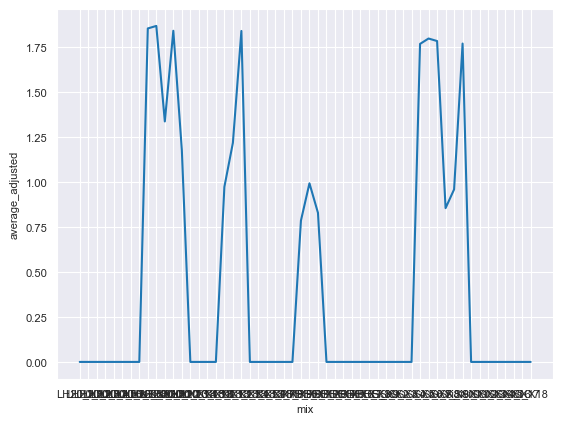

In [143]:
sns.lineplot(x = bio_data_processed['mix'], y = bio_data_processed['average_adjusted'])

In [150]:
mix_name_pos = [x+'_P' for x in bio_data_processed['mix']]

In [154]:
bio_data_processed

,Well Number,mix,OD600-1,OD600-2,Average,Stdev,average_adjusted,pos_p_value,neg_p_value,peak_label
0,A1,LH20_X1,1.519,1.510,1.515,0.006,0.000,0.000208,0.929893,False
1,A2,LH20_X2,1.468,1.272,1.370,0.139,0.000,0.000539,0.847887,False
2,A3,LH20_X3,1.622,1.231,1.427,0.276,0.000,0.000433,0.881982,False
3,A4,LH20_X4,1.401,1.462,1.432,0.043,0.000,0.000350,0.889574,False
4,A5,LH20_X5,1.601,1.238,1.420,0.257,0.000,0.000441,0.878386,False
5,A6,LH20_X6,1.701,1.132,1.417,0.402,0.000,0.000558,0.870646,False
6,A7,LH20_X7,1.909,1.131,1.520,0.550,0.000,0.000406,0.916874,False
7,A8,LH20_X8,1.742,1.376,1.559,0.259,0.000,0.000189,0.942623,False
8,A9,LH20_X9,0.050,0.075,0.063,0.018,1.854,0.661295,0.002421,True
9,A10,LH20_X10,0.052,0.046,0.049,0.004,1.868,0.678409,0.002220,True


In [151]:
alignment = pd.read_csv(os.path.join(alignment_dir, 'alignment_result_cleaned.csv'))

In [152]:
alignment_fraction = alignment[mix_name_pos]

In [168]:
correlation = []
p_values = []
max_values = []
for index, row in alignment_fraction.iterrows():
    temp = (pearsonr(row.values, bio_data_processed['average_adjusted']))
    max_values.append(row.values.max())
    if temp[0]!=temp[0]: # this is nan
        correlation.append(0)
        p_values.append(0)
    else:
        correlation.append(temp[0])
        p_values.append(temp[1])
correlation_result_temp = alignment.copy()
correlation_result_temp.insert(2, 'correlation', correlation)
correlation_result_temp.insert(3, 'max_values', max_values)
correlation_result_temp.insert(4, 'p_values', p_values)
correlation_result_temp = correlation_result_temp[correlation_result_temp['max_values']!=0]
intensity_log10 = np.log10(correlation_result_temp['max_values'])
intensity_log10 = [x/intensity_log10.max() for x in intensity_log10]
correlation_result_temp['log_intensity_normalized']=intensity_log10
correlation_result_temp.insert(0, 'score', correlation_result_temp['log_intensity_normalized']*correlation_result_temp['correlation'])

# correlation_result_temp['score']=
correlation_result_temp.sort_values(by = 'score', ascending=False, inplace=True)
correlation_result_temp.insert(0, 'rank', np.arange(len(correlation_result_temp)))

In [170]:
correlation_result_temp

,rank,score,pmz,rt,correlation,max_values,p_values,annotation,feature_type,C18_X0_P,...,Si_X18_P,Si_X2_P,Si_X3_P,Si_X4_P,Si_X5_P,Si_X6_P,Si_X7_P,Si_X8_P,Si_X9_P,log_intensity_normalized
2838,0,0.772315,282.0808,1.786313,0.862666,5.253042e+07,5.117004e-17,unknown,compound,1.299701e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,1.770530e+06,4.427643e+07,3.488873e+07,2.386953e+07,1.179156e+07,7.743314e+06,0.895265
3324,1,0.764599,301.0520,2.035756,0.856172,5.026337e+07,1.564579e-16,unknown,compound,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,3.094803e+06,5.026337e+07,2.537580e+07,2.029933e+07,1.170562e+07,8.537312e+06,0.893044
3754,2,0.760122,301.0519,2.299176,0.844756,5.749320e+07,9.833768e-16,unknown,compound,0.000000e+00,...,0.000000e+00,0.000000e+00,1.918329e+04,3.739106e+06,4.488483e+07,2.832714e+07,2.075457e+07,1.071021e+07,7.254112e+06,0.899812
3283,3,0.744985,398.0944,2.009664,0.846425,3.891418e+07,7.587225e-16,unknown,compound,3.245152e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,6.611941e+04,1.619918e+07,3.201772e+07,1.923336e+07,9.250399e+06,5.426343e+06,0.880155
2885,4,0.742116,287.0358,1.802680,0.868479,2.338171e+07,1.791043e-17,unknown,compound,7.034071e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,9.503554e+05,2.338171e+07,2.211005e+07,1.831499e+07,1.043091e+07,6.907561e+06,0.854501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4042,32969,-0.263427,144.1741,2.520361,-0.373007,1.230859e+06,5.470796e-03,unknown,compound,3.005897e+05,...,1.473067e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.706226
7329,32970,-0.299631,453.1692,5.673486,-0.426625,1.139208e+06,1.295664e-03,unknown,compound,3.302842e+05,...,4.474151e+05,2.883040e+05,1.611377e+05,8.340488e+04,0.000000e+00,8.075627e+04,1.281380e+05,1.525593e+05,1.938335e+05,0.702329
4450,32971,-0.348656,244.0992,2.829717,-0.482276,1.715274e+06,2.217250e-04,C6-APS,istd,1.568732e+06,...,1.492449e+06,1.592284e+06,1.399875e+06,1.213614e+06,1.168062e+06,9.805344e+05,1.036658e+06,1.106075e+06,1.163224e+06,0.722938
1898,32972,-0.391823,216.0686,1.199736,-0.603669,3.956535e+05,1.350447e-06,C4-APS,istd,3.884992e+05,...,2.867443e+05,3.580019e+05,3.479255e+05,1.539706e+05,2.594282e+05,2.620190e+05,3.254392e+05,3.021756e+05,3.170762e+05,0.649069


In [171]:
correlation_result_temp.to_csv(os.path.join(result_dir, 'correlation_result_updated20230830.csv'), index = False)

In [83]:
correlation_result_temp.to_csv(os.path.join(result_dir, 'bety_correlation_result.csv'), index = False)

In [58]:
correlation_result_temp_a=pd.read_csv(os.path.join(result_dir, 'correlation_result_20230824.csv'))

In [47]:
correlation_result_temp_b = pd.read_csv(os.path.join(result_dir, 'bety_correlation_result.csv'))

In [50]:
quick_search_values(correlation_result_temp_b, 'mz', 301.05218-0.005, 301.05218+0.005, ifsorted=False)

,mz,RT,correlation,max_values,p_values,Blank_05_P.mzML,Blank_06_P.mzML,Blank07_P.mzML,C18_X0_P.mzML,C18_X1_P.mzML,...,Si_X2_P.mzML,Si_X3_P.mzML,Si_X4_P.mzML,Si_X5_P.mzML,Si_X6_P.mzML,Si_X7_P.mzML,Si_X8_P.mzML,Si_X9_P.mzML,log_intensity_normalized,score
9794,301.05162,1.1015,-0.067295,1627499,6.287471e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.691511,-0.046535
9509,301.05171,1.0316,-0.066097,1352312,6.348837e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.682556,-0.045115
7030,301.05176,1.6393,-0.057269,216022,6.808296e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.593875,-0.034011
870,301.05179,0.7667,0.334541,653616,1.341560e-02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.647404,0.216583
7961,301.05188,1.3269,-0.057269,323445,6.808296e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.613391,-0.035128
498,301.05189,2.4412,0.334541,14951585,1.341560e-02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.798738,0.267211
9402,301.05199,1.7975,-0.064213,1213498,6.445837e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.677319,-0.043492
7160,301.05204,1.5614,-0.057269,226166,6.808296e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.596093,-0.034138
398,301.05204,2.3161,0.322053,63891760,1.755488e-02,0,0,0,0,0,...,0,0,5355324,0,35783224,25853552,14009525,0,0.868958,0.279851
518,301.05212,2.3901,0.323671,21114778,1.696390e-02,0,0,0,0,0,...,0,0,0,0,17415634,12075410,5111332,0,0.815426,0.263929


In [48]:
correlation_result_temp_b

,mz,RT,correlation,max_values,p_values,Blank_05_P.mzML,Blank_06_P.mzML,Blank07_P.mzML,C18_X0_P.mzML,C18_X1_P.mzML,...,Si_X2_P.mzML,Si_X3_P.mzML,Si_X4_P.mzML,Si_X5_P.mzML,Si_X6_P.mzML,Si_X7_P.mzML,Si_X8_P.mzML,Si_X9_P.mzML,log_intensity_normalized,score
0,301.05218,2.0260,0.707341,68605152,2.239950e-09,0,0,0,0,2778284,...,0,0,4112292,68605152,33423154,27341590,14174891,10940058,0.872400,0.617084
1,296.09741,2.0192,0.674130,126058320,2.299212e-08,0,0,0,0,998514,...,0,0,5340284,98608600,0,27694376,11997613,9081520,0.901814,0.607940
2,282.08060,1.8293,0.687270,60501160,9.491837e-09,0,0,0,168404,17175974,...,0,0,2444026,51792876,35428284,25106808,12861650,7774374,0.866322,0.595397
3,282.08047,1.7574,0.673077,60919904,2.463509e-08,0,0,0,147631,7780986,...,0,0,1815747,52500784,0,28774072,14839665,9775954,0.866655,0.583326
4,296.09751,2.3304,0.616083,154683696,7.081591e-07,0,0,0,0,2630826,...,0,0,0,60467624,32297526,18856326,8406237,6700460,0.911708,0.561688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748,252.06696,2.1180,-0.414839,553190,1.814982e-03,353235,304780,0,481336,238462,...,339564,216843,0,0,0,126492,104766,137148,0.639338,-0.265222
12749,274.27404,5.1443,-0.358972,4928717,7.683835e-03,4461237,4520492,5761358,4892234,4684461,...,4169170,4275012,0,0,0,4294860,4308498,4078966,0.745083,-0.267464
12750,250.17694,4.9524,-0.389677,2741457,3.584097e-03,500931,819249,1306678,857901,771735,...,813750,763955,0,833299,0,0,0,773778,0.716722,-0.279290
12751,660.30704,9.7170,-0.404862,2212870,2.391996e-03,2050236,0,0,1089979,820738,...,684009,671112,0,652681,0,0,873360,0,0.706366,-0.285980


In [56]:
quick_search_values(correlation_result_temp_b, 'mz', 301.05204-0.005, 301.05204+0.005, ifsorted=False)

,mz,RT,correlation,max_values,p_values,Blank_05_P.mzML,Blank_06_P.mzML,Blank07_P.mzML,C18_X0_P.mzML,C18_X1_P.mzML,...,Si_X2_P.mzML,Si_X3_P.mzML,Si_X4_P.mzML,Si_X5_P.mzML,Si_X6_P.mzML,Si_X7_P.mzML,Si_X8_P.mzML,Si_X9_P.mzML,log_intensity_normalized,score
9794,301.05162,1.1015,-0.067295,1627499,6.287471e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.691511,-0.046535
9509,301.05171,1.0316,-0.066097,1352312,6.348837e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.682556,-0.045115
7030,301.05176,1.6393,-0.057269,216022,6.808296e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.593875,-0.034011
870,301.05179,0.7667,0.334541,653616,1.341560e-02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.647404,0.216583
7961,301.05188,1.3269,-0.057269,323445,6.808296e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.613391,-0.035128
498,301.05189,2.4412,0.334541,14951585,1.341560e-02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.798738,0.267211
9402,301.05199,1.7975,-0.064213,1213498,6.445837e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.677319,-0.043492
7160,301.05204,1.5614,-0.057269,226166,6.808296e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.596093,-0.034138
398,301.05204,2.3161,0.322053,63891760,1.755488e-02,0,0,0,0,0,...,0,0,5355324,0,35783224,25853552,14009525,0,0.868958,0.279851
518,301.05212,2.3901,0.323671,21114778,1.696390e-02,0,0,0,0,0,...,0,0,0,0,17415634,12075410,5111332,0,0.815426,0.263929


In [90]:
peak_list = readin_peak_list(os.path.join(peak_list_dir, 'C18_X2_P.txt'))

In [103]:
correlation_result_temp_a.insert(0, 'rank', np.arange(len(correlation_result_temp_a)))
correlation_result_temp_b.insert(0, 'rank', np.arange(len(correlation_result_temp_b)))

In [73]:
top100_a = correlation_result_temp_a.head(100)
top100_b = correlation_result_temp_b.head(100)

In [97]:
rank_a= []
rank_b = []
corr_a = []
corr_b = []
pmz_common = []
rt_common = []
for index, row in top100_a.iterrows():
    feature_temp = find_feature(top100_b, row['pmz'], row['rt'], mz_column='mz', rt_column='RT')
    if len(feature_temp)>0:
        rank_a.append(row['rank'])
        rank_b.append(feature_temp.iloc[0]['rank'])
        pmz_common.append(row['pmz'])
        rt_common.append(row['rt'])
        corr_a.append(row['correlation'])
        corr_b.append(row['correlation'])
comparative_df = pd.DataFrame(zip(pmz_common, rt_common, corr_a, corr_b, rank_a, rank_b),
                              columns=['pmz', 'rt', 'corr_a', 'corr_b', 'rank_a', 'rank_b']
                              )
    # break

In [99]:
comparative_df.to_csv(os.path.join(result_dir, 'comparative_result.csv'), index = False)

In [104]:
corr_b = []
rank_b = []
for index, row in top100_a.iterrows():
    feature_temp = find_feature(correlation_result_temp_b, row['pmz'], row['rt'], mz_column='mz', rt_column='RT')
    if len(feature_temp)>0:
        corr_b.append(feature_temp.iloc[0]['correlation'])
        rank_b.append(feature_temp.iloc[0]['rank'])
    else:
        corr_b.append(-1)
        rank_b.append(-1)
top100_a_sta = top100_a.copy()
top100_a_sta.insert(4, 'correlation_b', corr_b)
top100_a_sta.insert(1, 'rank_b', rank_b)

In [105]:
top100_a_sta

,rank,rank_b,pmz,rt,correlation,correlation_b,max_values,p_values,annotation,feature_type,...,Si_X2_P,Si_X3_P,Si_X4_P,Si_X5_P,Si_X6_P,Si_X7_P,Si_X8_P,Si_X9_P,log_intensity_normalized,score
0,0,0.0,301.0520,2.035756,0.721007,0.707341,50263368.0,7.808312e-10,unknown,compound,...,0.0000,0.000000,3.094803e+06,50263368.0,25375798.00,20299330.0,1.170562e+07,8.537312e+06,0.893044,0.643890
1,1,398.0,301.0519,2.299176,0.708156,0.322053,57493196.0,2.107084e-09,unknown,compound,...,0.0000,19183.287109,3.739106e+06,44884828.0,28327144.00,20754570.0,1.071021e+07,7.254112e+06,0.899812,0.637207
2,2,781.0,265.0560,1.385922,0.718448,0.261971,41626760.0,9.555776e-10,unknown,compound,...,0.0000,0.000000,5.999078e+05,23674818.0,22232852.00,13106431.0,6.350799e+06,3.853109e+06,0.883549,0.634784
3,3,3070.0,287.0358,1.802680,0.711442,0.076329,23381712.0,1.643088e-09,unknown,compound,...,0.0000,0.000000,9.503554e+05,23381712.0,22110048.00,18314990.0,1.043091e+07,6.907561e+06,0.854501,0.607928
4,4,1.0,296.0974,2.035756,0.655242,0.674130,89091864.0,7.604985e-08,unknown,compound,...,0.0000,23419.000000,3.969654e+06,63260252.0,29616860.00,18962038.0,9.132058e+06,6.629276e+06,0.921870,0.604048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,368.0,282.0807,1.368125,0.467683,0.319591,88667680.0,3.627503e-04,unknown,compound,...,0.0000,0.000000,0.000000e+00,0.0,0.00,25752102.0,0.000000e+00,7.645610e+06,0.921629,0.431030
96,96,41.0,338.2657,5.655423,0.565185,0.555736,3659754.5,8.482764e-06,unknown,compound,...,138186.0625,195377.093750,6.965806e+05,3659754.5,3074114.25,1841095.0,2.134864e+06,1.350218e+06,0.761103,0.430164
97,97,11306.0,426.1256,2.865771,0.494863,-0.088476,29590208.0,1.424201e-04,unknown,compound,...,0.0000,0.000000,0.000000e+00,4137701.0,2534912.25,1536092.0,6.665474e+05,4.905867e+05,0.866361,0.428730
98,98,216.0,282.0809,0.603533,0.513959,0.396560,15393064.0,7.034760e-05,unknown,compound,...,0.0000,0.000000,0.000000e+00,0.0,0.00,7516797.5,0.000000e+00,0.000000e+00,0.833448,0.428358


In [109]:
feature_temp = find_feature(correlation_result_temp_b, 287.0358, 1.802680, mz_column='mz', rt_column='RT')

In [139]:
correlation_result_temp_b

,rank,mz,RT,correlation,max_values,p_values,Blank_05_P.mzML,Blank_06_P.mzML,Blank07_P.mzML,C18_X0_P.mzML,...,Si_X2_P.mzML,Si_X3_P.mzML,Si_X4_P.mzML,Si_X5_P.mzML,Si_X6_P.mzML,Si_X7_P.mzML,Si_X8_P.mzML,Si_X9_P.mzML,log_intensity_normalized,score
0,0,301.05218,2.0260,0.707341,68605152,2.239950e-09,0,0,0,0,...,0,0,4112292,68605152,33423154,27341590,14174891,10940058,0.872400,0.617084
1,1,296.09741,2.0192,0.674130,126058320,2.299212e-08,0,0,0,0,...,0,0,5340284,98608600,0,27694376,11997613,9081520,0.901814,0.607940
2,2,282.08060,1.8293,0.687270,60501160,9.491837e-09,0,0,0,168404,...,0,0,2444026,51792876,35428284,25106808,12861650,7774374,0.866322,0.595397
3,3,282.08047,1.7574,0.673077,60919904,2.463509e-08,0,0,0,147631,...,0,0,1815747,52500784,0,28774072,14839665,9775954,0.866655,0.583326
4,4,296.09751,2.3304,0.616083,154683696,7.081591e-07,0,0,0,0,...,0,0,0,60467624,32297526,18856326,8406237,6700460,0.911708,0.561688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748,12748,252.06696,2.1180,-0.414839,553190,1.814982e-03,353235,304780,0,481336,...,339564,216843,0,0,0,126492,104766,137148,0.639338,-0.265222
12749,12749,274.27404,5.1443,-0.358972,4928717,7.683835e-03,4461237,4520492,5761358,4892234,...,4169170,4275012,0,0,0,4294860,4308498,4078966,0.745083,-0.267464
12750,12750,250.17694,4.9524,-0.389677,2741457,3.584097e-03,500931,819249,1306678,857901,...,813750,763955,0,833299,0,0,0,773778,0.716722,-0.279290
12751,12751,660.30704,9.7170,-0.404862,2212870,2.391996e-03,2050236,0,0,1089979,...,684009,671112,0,652681,0,0,873360,0,0.706366,-0.285980


In [136]:
ms1, ms2 = ff.process_mzml('/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230607_NQ_Development_H2Lv2/mzml/pos/Si_X7_P.mzML', if_mix=False)


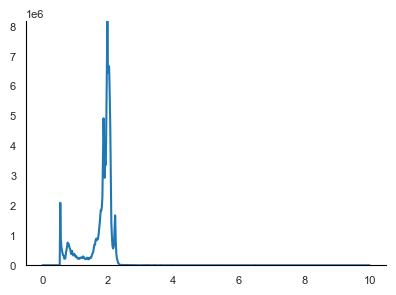

In [137]:
rt_list, intensity_list = ff.get_EIC_list(ms1, 403.0480)
EIC(rt_list, intensity_list,
    # vlines_location_1=[2.00],=-
    # rt_start=1.8, rt_end=2.5
    )

In [40]:
ms1, ms2 = ff.process_mzml('/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230607_NQ_Development_H2Lv2/mzml/pos/C18_X2_P.mzML', if_mix=False)

In [54]:
rt_list, intensity_list = ff.get_EIC_list(ms1, 301.05204)

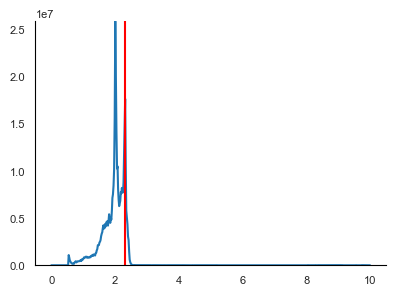

In [15]:
active_fractions = bio_data_processed[bio_data_processed['peak_label']==True]
active_fractions.sort_values(by = 'average_adjusted', inplace = True, ascending=False)

In [33]:
correlation = []
p_values = []
max_values = []
for index, row in alignment_fractions.iterrows():
    temp = (pearsonr(row.values, bio_data_processed['activity_processed']))
    max_values.append(row.values.max())
    if temp[0]!=temp[0]: # this is nan
        correlation.append(0)
        p_values.append(0)
    else:
        correlation.append(temp[0])
        p_values.append(temp[1])
correlation_result_temp = alignment_istd_cleaned.copy()
correlation_result_temp.insert(2, 'correlation', correlation)
correlation_result_temp.insert(3, 'max_values', max_values)
correlation_result_temp.insert(4, 'p_values', p_values)

# correlation_result_temp.sort_values(by = 'correlation', inplace=True, ascending=False)
# correlation_result_temp.insert(2, 'rank', np.arange(len(correlation_result_temp)))

In [49]:
correlation_result_temp = correlation_result_temp[correlation_result_temp['max_values']!=0]
intensity_log10 = np.log10(correlation_result_temp['max_values'])
intensity_log10 = [x/intensity_log10.max() for x in intensity_log10]
correlation_result_temp['log_intensity_normalized']=intensity_log10
correlation_result_temp['score']=correlation_result_temp['log_intensity_normalized']*correlation_result_temp['correlation']
correlation_result_temp.sort_values(by = 'score', ascending=False, inplace=True)

In [52]:
correlation_result_temp.reset_index(inplace=True, drop = True)

In [ ]:
correlation_result_temp['rank']=np.arange(len(correlation_result_temp))

In [55]:
correlation_result_temp.to_csv(os.path.join(result_dir, 'correlation_result_20230824.csv'), index=False)

In [60]:
top100 = correlation_result_temp.head(100)

In [61]:
figure_dir = '/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230607_NQ_Development_H2Lv2/results/figures_updated_20230824'
if os.path.exists(figure_dir)==False:
    os.makedirs(figure_dir)
for index, row in tqdm(top100.iterrows(), total = len(top100)) :
    idx = index
    fig, axs = plt.subplots(figsize = (10,8))
    sns.lineplot(x =  bio_data_processed['mix'], y = [x/bio_data_processed['average_adjusted'].max() for x in bio_data_processed['average_adjusted']], color = 'blue', label = 'bioactivity')
    sns.lineplot(x =  bio_data_processed['mix'], y = [x/correlation_result_temp.loc[idx][mix_name_pos].max() for x in correlation_result_temp.loc[idx][mix_name_pos]], color = 'orange', marker = 'D', label = 'feature intensity')
    plt.legend(loc = 'upper right')
    # plt.legend()
    # plt.vlines(x = 7, ymin = 0, ymax = 1, colors='green')
    # plt.vlines(x = 10, ymin = 0, ymax = 1,colors='green')
    plt.xticks(rotation = 90)
    plt.savefig(os.path.join(figure_dir, str(row['rank'])+'_'+str(row['pmz'])+'_'+str(np.round(row['rt'], 3))+'.png'))
    plt.close(fig)

100%|██████████| 100/100 [00:51<00:00,  1.93it/s]


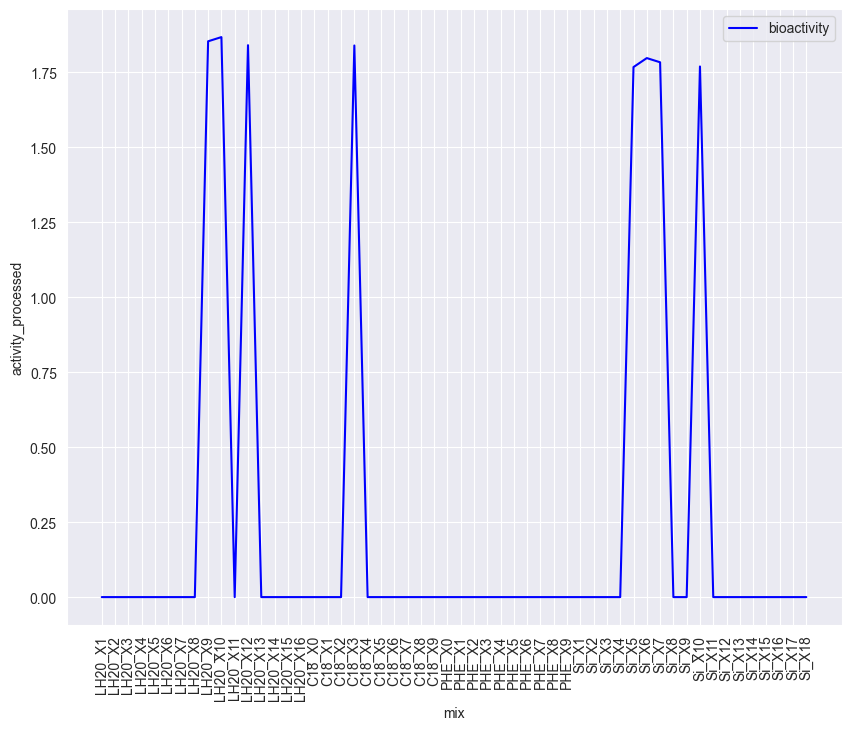

In [63]:
fig, axs = plt.subplots(figsize = (10,8))
sns.lineplot(x =  bio_data_processed['mix'], y = bio_data_processed['activity_processed'], color = 'blue', label = 'bioactivity')
# sns.lineplot(x =  bio_data_processed['mix'], y = [x/correlation_result_temp.loc[idx][mix_name_pos].max() for x in correlation_result_temp.loc[idx][mix_name_pos]], color = 'orange', marker = 'D', label = 'feature intensity')
plt.legend(loc = 'upper right')
# plt.legend()
# plt.vlines(x = 7, ymin = 0, ymax = 1, colors='green')
# plt.vlines(x = 10, ymin = 0, ymax = 1,colors='green')
plt.xticks(rotation = 90)
plt.savefig(os.path.join(figure_dir, 'reference_activity.png'))

In [505]:
# top101.to_csv(os.path.join(result_dir, 'top100_updated0801.csv'), index = False)
correlation_result_temp.to_csv(os.path.join(result_dir, 'correlation_all_updated0802.csv'), index = False)

In [230]:
additional_figure_dir = '/Volumes/Natural Product Chemistry/Working Space/Fanzhou/20230607_NQ_Development_H2Lv2/results/additional_figures'

In [252]:
pmz = 412.1086
quick_search_values(correlation_result_temp, 'pmz', pmz-0.005, pmz+0.005, ifsorted=False)

,pmz,rt,rank,correlation,p_values,annotation,feature_type,C18_X0_P,C18_X1_P,C18_X2_P,...,Si_X17_P,Si_X18_P,Si_X2_P,Si_X3_P,Si_X4_P,Si_X5_P,Si_X6_P,Si_X7_P,Si_X8_P,Si_X9_P
980,412.1067,0.723942,40810,-0.077060,5.796843e-01,unknown,compound,210833.296875,0.00,0.000,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000e+00,0.000000e+00,0.000
26652,412.1067,1.627400,15560,0.047907,7.308431e-01,unknown,compound,146659.359375,2054075.75,3239431.500,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000e+00,0.000000e+00,1462774.875
14417,412.1067,0.852261,1020,0.497921,1.275655e-04,unknown,compound,0.000000,0.00,0.000,...,0.0,0.0,0.0,0.0,0.000000,111946.25,0.0,0.000000e+00,0.000000e+00,709052.250
26395,412.1067,1.437146,13332,0.101376,4.657528e-01,unknown,compound,187413.859375,0.00,2272812.750,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000e+00,0.000000e+00,1724485.375
25622,412.1068,0.917149,8828,0.235002,8.716502e-02,unknown,compound,0.000000,0.00,1152684.875,...,0.0,0.0,0.0,0.0,0.000000,0.00,638370.0,6.289036e+05,5.075648e+05,0.000
31998,412.1068,1.306552,43995,-0.091959,5.083897e-01,unknown,compound,0.000000,0.00,1977223.875,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000e+00,5.362304e+05,1749683.125
3680,412.1069,2.245787,903,0.507472,8.981431e-05,unknown,compound,0.000000,0.00,0.000,...,0.0,0.0,0.0,0.0,0.000000,11208183.00,11007335.0,6.380604e+06,2.964818e+06,1998064.125
3904,412.1070,2.406789,164,0.620122,5.705617e-07,unknown,compound,0.000000,0.00,2772592.750,...,0.0,0.0,0.0,0.0,224077.265625,12872651.00,14459927.0,8.395627e+06,3.905122e+06,2613020.750
31612,412.1073,0.892313,469,0.555295,1.311612e-05,unknown,compound,0.000000,0.00,0.000,...,0.0,0.0,0.0,0.0,0.000000,111946.25,638370.0,6.289036e+05,5.075648e+05,0.000
31613,412.1075,0.892313,468,0.555295,1.311612e-05,unknown,compound,0.000000,0.00,0.000,...,0.0,0.0,0.0,0.0,0.000000,111946.25,638370.0,6.289036e+05,5.075648e+05,0.000


In [523]:
correlation_result_temp

,pmz,rt,rank,correlation,p_values,annotation,feature_type,C18_X0_P,C18_X1_P,C18_X2_P,...,Si_X17_P,Si_X18_P,Si_X2_P,Si_X3_P,Si_X4_P,Si_X5_P,Si_X6_P,Si_X7_P,Si_X8_P,Si_X9_P
15163,603.9946,1.385922,0,0.779261,3.910322e-12,unknown,compound,0,50265,97163,...,0,0,0,0,0,302016,235665,205499,114174,65967
1786,358.9937,1.074256,1,0.754948,4.262115e-11,unknown,compound,0,0,44954,...,0,0,0,0,0,92095,96362,86947,0,0
1783,321.0132,1.074256,2,0.753617,4.819215e-11,unknown,compound,0,0,77461,...,0,0,0,0,0,169500,175592,164506,0,0
1782,318.9760,1.074256,3,0.750395,6.465928e-11,unknown,compound,0,0,32480,...,0,0,0,0,0,71448,72282,64885,43245,0
3362,729.0635,2.035756,4,0.749890,6.768195e-11,unknown,compound,0,0,0,...,0,0,0,0,0,63565,30374,25749,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,216.0686,1.199736,45528,-0.411156,2.011608e-03,C4-APS,istd,388499,270124,167882,...,304734,286744,358001,347925,153970,259428,262018,325439,302175,317076
7333,461.2723,5.673486,45529,-0.416636,1.725369e-03,unknown,compound,98269,120337,57215,...,58293,113964,75522,0,0,0,0,0,0,84847
10870,406.1851,8.442166,45530,-0.419324,1.598772e-03,unknown,compound,6644,5643,4532,...,8685,12359,8379,0,0,0,4752,0,0,6685
4450,244.0992,2.829717,45531,-0.491069,1.630469e-04,C6-APS,istd,1568731,1715274,1444545,...,1577235,1492448,1592283,1399874,1213613,1168062,980534,1036658,1106075,1163224


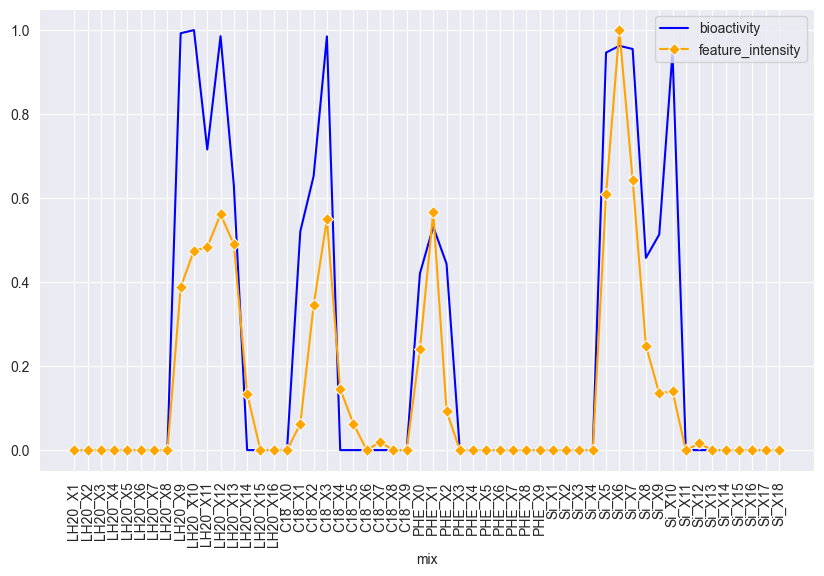

In [529]:
idx = 3296
instance = correlation_result_temp.loc[idx]
fig, axs = plt.subplots(figsize = (10,6))
sns.lineplot(x =  bio_data_processed['mix'], y = [x/bio_data_processed['average_adjusted'].max() for x in bio_data_processed['average_adjusted']], color = 'blue', label = 'bioactivity')
sns.lineplot(x =  bio_data_processed['mix'], y = [x/alignment_istd_cleaned.loc[idx][mix_name_pos].max() for x in alignment_istd_cleaned.loc[idx][mix_name_pos]], color = 'orange', marker = 'D', label = 'feature_intensity')
plt.legend(loc = 'upper right')
# plt.legend()
# plt.vlines(x = 7, ymin = 0, ymax = 1, colors='green')
# plt.vlines(x = 10, ymin = 0, ymax = 1,colors='green')
plt.xticks(rotation = 90)
plt.savefig(os.path.join(additional_figure_dir, str(instance['rank'])+'_'+str(instance['pmz'])+'_'+str(np.round(instance['rt'], 3))+'.png'))
# plt.show()


# extraction of spectra from peaklist

In [5]:
short_list = pd.read_csv('/Users/fanzhou.kong/Dropbox (Brightseed)/Mac/Downloads/shortlist.csv')

In [20]:
correlation_result_temp = pd.read_csv(os.path.join(results_dir, 'correlation_all_updated0801.csv'))

In [111]:
reference_file =[]
max_intensity = []
for index, row in short_list.iterrows():
    temp = string_search(correlation_result_temp, 'rank', row['rank'], reset_index=False)
    reference_file.append(temp[mix_name_pos].iloc[0].idxmax())
    max_intensity.append(temp[mix_name_pos].iloc[0].max())
    # break
short_list['reference_file']=reference_file
short_list['max_intensity']=max_intensity

In [112]:
short_list

,rank,m/z,rt,reference_file,ms1,ms2,msms,max_intensity
0,5,261.0594,2.053676,LH20_X9_P,261.0347\t0\n261.03696\t0\n261.03923\t0\n261.0...,71.01243\t26142\n85.02805\t19955\n89.02287\t42...,71.01243\t26142\n85.02805\t19955\n89.02287\t42...,3.927268e+06
1,8,595.0818,2.035756,Si_X5_P,595.00442\t0\n595.01221\t0\n595.02\t0\n595.082...,173.45198\t12490\n200.13734\t7870\n317.0256\t2...,173.45198\t12490\n200.13734\t7870\n317.0256\t2...,1.873935e+06
2,10,301.0520,2.035756,Si_X5_P,300.985\t0\n300.9878\t0\n300.9906\t0\n300.9934...,95.33739\t11766\n131.49423\t12242\n138.99969\t...,95.33739\t11766\n131.49423\t12242\n138.99969\t...,5.026337e+07
3,15,265.0560,1.385922,LH20_X12_P,264.77597\t0\n264.77828\t0\n264.7806\t0\n264.7...,71.01283\t341962\n71.01731\t15604\n85.02824\t2...,71.01283\t341962\n71.01731\t15604\n85.02824\t2...,4.162676e+07
4,17,287.0358,1.802680,Si_X5_P,286.96275\t0\n286.96536\t0\n286.96797\t0\n286....,76.77318\t10075\n82.73836\t9344\n91.44015\t874...,76.77318\t10075\n82.73836\t9344\n91.44015\t874...,2.338171e+07
5,19,610.0479,2.035756,Si_X5_P,609.95948\t0\n609.96757\t0\n609.97566\t0\n610....,233.98206\t9601\n247.13214\t8586\n287.9924\t19...,233.98206\t9601\n247.13214\t8586\n287.9924\t19...,2.032213e+06
6,20,324.1296,2.035756,Si_X5_P,324.09207\t0\n324.0952\t0\n324.09834\t0\n324.1...,94.50523\t4295\n106.90945\t5931\n120.5886\t634...,94.50523\t4295\n106.90945\t5931\n120.5886\t634...,5.283953e+06
7,32,579.1154,2.035756,Si_X5_P,579.04115\t0\n579.04863\t0\n579.05611\t0\n579....,204.50916\t9395\n262.49927\t9383\n275.02676\t9...,204.50916\t9395\n262.49927\t9383\n275.02676\t9...,4.984366e+06
8,36,403.0480,2.009664,Si_X6_P,402.96141\t0\n402.96576\t0\n402.9701\t0\n402.9...,107.66234\t5449\n110.29355\t5552\n120.8213\t72...,107.66234\t5449\n110.29355\t5552\n120.8213\t72...,1.041035e+07
9,43,606.0558,2.009664,Si_X5_P,605.99214\t0\n606.00015\t0\n606.00816\t0\n606....,NaN,NaN,1.559126e+05


In [22]:
correlation_result_temp

,pmz,rt,rank,correlation,p_values,annotation,feature_type,C18_X0_P,C18_X1_P,C18_X2_P,...,Si_X17_P,Si_X18_P,Si_X2_P,Si_X3_P,Si_X4_P,Si_X5_P,Si_X6_P,Si_X7_P,Si_X8_P,Si_X9_P
0,603.9946,1.385922,0,0.779261,3.910272e-12,unknown,compound,0.000000e+00,5.026523e+04,9.716312e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.020165e+05,235665.093750,2.054991e+05,1.141745e+05,6.596766e+04
1,358.9937,1.074256,1,0.754948,4.262427e-11,unknown,compound,0.000000e+00,0.000000e+00,4.495436e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.209523e+04,96362.226562,8.694737e+04,0.000000e+00,0.000000e+00
2,321.0132,1.074256,2,0.753617,4.819144e-11,unknown,compound,0.000000e+00,0.000000e+00,7.746143e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.695001e+05,175592.562500,1.645065e+05,0.000000e+00,0.000000e+00
3,318.9760,1.074256,3,0.750397,6.464988e-11,unknown,compound,0.000000e+00,0.000000e+00,3.248006e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.144887e+04,72282.734375,6.488504e+04,4.324534e+04,0.000000e+00
4,729.0635,2.035756,4,0.749893,6.766226e-11,unknown,compound,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.356568e+04,30374.943359,2.574996e+04,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,216.0686,1.199736,45528,-0.411157,2.011593e-03,C4-APS,istd,3.884992e+05,2.701241e+05,1.678826e+05,...,3.047345e+05,2.867443e+05,3.580019e+05,3.479255e+05,1.539706e+05,2.594282e+05,262018.953125,3.254392e+05,3.021756e+05,3.170762e+05
45529,461.2723,5.673486,45529,-0.416637,1.725354e-03,unknown,compound,9.826917e+04,1.203372e+05,5.721533e+04,...,5.829317e+04,1.139643e+05,7.552218e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,8.484716e+04
45530,406.1851,8.442166,45530,-0.419327,1.598634e-03,unknown,compound,6.644879e+03,5.643328e+03,4.532178e+03,...,8.685368e+03,1.235984e+04,8.379613e+03,0.000000e+00,0.000000e+00,0.000000e+00,4752.005371,0.000000e+00,0.000000e+00,6.685369e+03
45531,244.0992,2.829717,45531,-0.491069,1.630468e-04,C6-APS,istd,1.568732e+06,1.715274e+06,1.444545e+06,...,1.577236e+06,1.492449e+06,1.592284e+06,1.399875e+06,1.213614e+06,1.168062e+06,980534.437500,1.036658e+06,1.106075e+06,1.163224e+06


In [48]:
ms1 = []
ms2 = []
for index, row in tqdm(short_list.iterrows(), total = len(short_list)):
    peak_list_temp = pd.read_csv(os.path.join(normalized_dir, row['reference_file']+'.csv'))
    feature_temp = find_feature(peak_list_temp, mz=row['m/z'], rt = row['rt'], mz_column='Precursor m/z', rt_column='RT_adjusted')
    try:
        ms1.append(so.convert_msdial_to_string(feature_temp.iloc[0]['MS1 isotopes']))
    except:
        ms1.append(np.NAN)
    try:
        ms2.append(so.convert_msdial_to_string(feature_temp.iloc[0]['MSMS spectrum']))
    except:
        ms2.append(np.NAN)
short_list['ms1']=ms1
short_list['msms']=ms2
    # if len(feature_temp)!=1:
    #     print('something is wrong')
    #     break
    # break

100%|██████████| 17/17 [00:04<00:00,  3.90it/s]


In [47]:
for index, row in short_list.iterrows():


,rank,m/z,rt,reference_file,ms1,ms2
0,5,261.0594,2.053676,LH20_X9_P,261.0347\t0\n261.03696\t0\n261.03923\t0\n261.0...,71.01243\t26142\n85.02805\t19955\n89.02287\t42...
1,8,595.0818,2.035756,Si_X5_P,595.00442\t0\n595.01221\t0\n595.02\t0\n595.082...,173.45198\t12490\n200.13734\t7870\n317.0256\t2...
2,10,301.0520,2.035756,Si_X5_P,300.985\t0\n300.9878\t0\n300.9906\t0\n300.9934...,95.33739\t11766\n131.49423\t12242\n138.99969\t...
3,15,265.0560,1.385922,LH20_X12_P,264.77597\t0\n264.77828\t0\n264.7806\t0\n264.7...,71.01283\t341962\n71.01731\t15604\n85.02824\t2...
4,17,287.0358,1.802680,Si_X5_P,286.96275\t0\n286.96536\t0\n286.96797\t0\n286....,76.77318\t10075\n82.73836\t9344\n91.44015\t874...
5,19,610.0479,2.035756,Si_X5_P,609.95948\t0\n609.96757\t0\n609.97566\t0\n610....,233.98206\t9601\n247.13214\t8586\n287.9924\t19...
6,20,324.1296,2.035756,Si_X5_P,324.09207\t0\n324.0952\t0\n324.09834\t0\n324.1...,94.50523\t4295\n106.90945\t5931\n120.5886\t634...
7,32,579.1154,2.035756,Si_X5_P,579.04115\t0\n579.04863\t0\n579.05611\t0\n579....,204.50916\t9395\n262.49927\t9383\n275.02676\t9...
8,36,403.0480,2.009664,Si_X6_P,402.96141\t0\n402.96576\t0\n402.9701\t0\n402.9...,107.66234\t5449\n110.29355\t5552\n120.8213\t72...
9,43,606.0558,2.009664,Si_X5_P,605.99214\t0\n606.00015\t0\n606.00816\t0\n606....,NaN


In [51]:
from toolsets.constants import single_charged_adduct_mass

-17.026599999999974

In [56]:
279.0708-261.0594

18.011400000000037

In [52]:
from toolsets.constants import single_charged_adduct_mass

In [55]:
single_charged_adduct_mass['[M+Na]+']-single_charged_adduct_mass['[M+H]+']

21.981942

In [80]:
short_list

,rank,m/z,rt,reference_file,ms1,ms2,msms
0,5,261.0594,2.053676,LH20_X9_P,261.0347\t0\n261.03696\t0\n261.03923\t0\n261.0...,71.01243\t26142\n85.02805\t19955\n89.02287\t42...,71.01243\t26142\n85.02805\t19955\n89.02287\t42...
1,8,595.0818,2.035756,Si_X5_P,595.00442\t0\n595.01221\t0\n595.02\t0\n595.082...,173.45198\t12490\n200.13734\t7870\n317.0256\t2...,173.45198\t12490\n200.13734\t7870\n317.0256\t2...
2,10,301.0520,2.035756,Si_X5_P,300.985\t0\n300.9878\t0\n300.9906\t0\n300.9934...,95.33739\t11766\n131.49423\t12242\n138.99969\t...,95.33739\t11766\n131.49423\t12242\n138.99969\t...
3,15,265.0560,1.385922,LH20_X12_P,264.77597\t0\n264.77828\t0\n264.7806\t0\n264.7...,71.01283\t341962\n71.01731\t15604\n85.02824\t2...,71.01283\t341962\n71.01731\t15604\n85.02824\t2...
4,17,287.0358,1.802680,Si_X5_P,286.96275\t0\n286.96536\t0\n286.96797\t0\n286....,76.77318\t10075\n82.73836\t9344\n91.44015\t874...,76.77318\t10075\n82.73836\t9344\n91.44015\t874...
5,19,610.0479,2.035756,Si_X5_P,609.95948\t0\n609.96757\t0\n609.97566\t0\n610....,233.98206\t9601\n247.13214\t8586\n287.9924\t19...,233.98206\t9601\n247.13214\t8586\n287.9924\t19...
6,20,324.1296,2.035756,Si_X5_P,324.09207\t0\n324.0952\t0\n324.09834\t0\n324.1...,94.50523\t4295\n106.90945\t5931\n120.5886\t634...,94.50523\t4295\n106.90945\t5931\n120.5886\t634...
7,32,579.1154,2.035756,Si_X5_P,579.04115\t0\n579.04863\t0\n579.05611\t0\n579....,204.50916\t9395\n262.49927\t9383\n275.02676\t9...,204.50916\t9395\n262.49927\t9383\n275.02676\t9...
8,36,403.0480,2.009664,Si_X6_P,402.96141\t0\n402.96576\t0\n402.9701\t0\n402.9...,107.66234\t5449\n110.29355\t5552\n120.8213\t72...,107.66234\t5449\n110.29355\t5552\n120.8213\t72...
9,43,606.0558,2.009664,Si_X5_P,605.99214\t0\n606.00015\t0\n606.00816\t0\n606....,NaN,NaN


In [81]:
from toolsets.spectra_plotter import head_to_tail_plot

In [103]:
short_list.iloc[2]['m/z']

301.052

In [102]:
so.convert_string_to_nist(short_list.iloc[7]['msms'])

array([[2.0450916e+02, 9.3950000e+03],
       [2.6249927e+02, 9.3830000e+03],
       [2.7502676e+02, 9.8620000e+03],
       [3.0105307e+02, 1.1106402e+07],
       [3.0113379e+02, 6.6906000e+04],
       [3.0205560e+02, 1.5035000e+04],
       [3.4708282e+02, 5.0454000e+04],
       [3.5008603e+02, 9.1800000e+03],
       [4.6309363e+02, 4.5145500e+05],
       [5.6109375e+02, 1.8618000e+04]], dtype=float32)

<module 'matplotlib.pyplot' from '/Users/fanzhou.kong/miniconda3/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

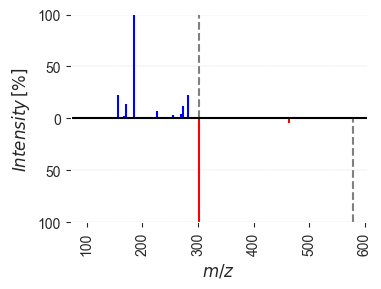

In [99]:
head_to_tail_plot(short_list.iloc[2]['ms2'], short_list.iloc[7]['ms2'], pmz1=short_list.iloc[2]['m/z'], pmz2=short_list.iloc[7]['m/z'])

In [89]:
so.convert_string_to_nist(short_list.iloc[7]['ms2'])

array([[2.0450916e+02, 9.3950000e+03],
       [2.6249927e+02, 9.3830000e+03],
       [2.7502676e+02, 9.8620000e+03],
       [3.0105307e+02, 1.1106402e+07],
       [3.0113379e+02, 6.6906000e+04],
       [3.0205560e+02, 1.5035000e+04],
       [3.4708282e+02, 5.0454000e+04],
       [3.5008603e+02, 9.1800000e+03],
       [4.6309363e+02, 4.5145500e+05],
       [5.6109375e+02, 1.8618000e+04]], dtype=float32)

In [97]:
579.1154-301

278.1154

In [96]:
short_list.iloc[7]

rank                                                             32
m/z                                                        579.1154
rt                                                         2.035756
reference_file                                              Si_X5_P
ms1               579.04115\t0\n579.04863\t0\n579.05611\t0\n579....
ms2               204.50916\t9395\n262.49927\t9383\n275.02676\t9...
msms              204.50916\t9395\n262.49927\t9383\n275.02676\t9...
Name: 7, dtype: object

In [93]:
short_list.iloc[2]

rank                                                             10
m/z                                                         301.052
rt                                                         2.035756
reference_file                                              Si_X5_P
ms1               300.985\t0\n300.9878\t0\n300.9906\t0\n300.9934...
ms2               95.33739\t11766\n131.49423\t12242\n138.99969\t...
msms              95.33739\t11766\n131.49423\t12242\n138.99969\t...
Name: 2, dtype: object

In [90]:
so.convert_string_to_nist(short_list.iloc[2]['ms2'])

array([[9.5337387e+01, 1.1766000e+04],
       [1.3149423e+02, 1.2242000e+04],
       [1.3899969e+02, 5.5813000e+04],
       [1.3903644e+02, 2.7256000e+04],
       [1.5301602e+02, 3.6706000e+04],
       [1.5701036e+02, 1.1285660e+06],
       [1.5702405e+02, 1.3998000e+04],
       [1.5846548e+02, 1.2286000e+04],
       [1.6703114e+02, 1.3676600e+05],
       [1.7102612e+02, 6.9048000e+05],
       [1.7104176e+02, 1.0764000e+04],
       [1.8502069e+02, 1.4115000e+04],
       [1.8504175e+02, 4.9817200e+06],
       [1.8505833e+02, 7.6916000e+04],
       [1.8508054e+02, 4.9160000e+04],
       [1.9902109e+02, 3.0268000e+04],
       [2.2701607e+02, 3.3897900e+05],
       [2.4103186e+02, 8.5816000e+04],
       [2.5501082e+02, 1.4876700e+05],
       [2.5504724e+02, 1.6424000e+05],
       [2.6902637e+02, 2.2510200e+05],
       [2.7298779e+02, 1.8645000e+04],
       [2.7302145e+02, 5.9744900e+05],
       [2.7304767e+02, 1.0032000e+04],
       [2.8304230e+02, 1.1400160e+06]], dtype=float32)

In [94]:
301.052-157

144.05200000000002

In [50]:
from toolsets.file_io import export_mgf_shortlist
for index, row in short_list.iterrows():
    if row['ms2']==row['ms2']:
        export_mgf_shortlist(row, sirius_input_dir)

In [70]:
short_list

,rank,m/z,rt,reference_file,ms1,ms2,msms
0,5,261.0594,2.053676,LH20_X9_P,261.0347\t0\n261.03696\t0\n261.03923\t0\n261.0...,71.01243\t26142\n85.02805\t19955\n89.02287\t42...,71.01243\t26142\n85.02805\t19955\n89.02287\t42...
1,8,595.0818,2.035756,Si_X5_P,595.00442\t0\n595.01221\t0\n595.02\t0\n595.082...,173.45198\t12490\n200.13734\t7870\n317.0256\t2...,173.45198\t12490\n200.13734\t7870\n317.0256\t2...
2,10,301.0520,2.035756,Si_X5_P,300.985\t0\n300.9878\t0\n300.9906\t0\n300.9934...,95.33739\t11766\n131.49423\t12242\n138.99969\t...,95.33739\t11766\n131.49423\t12242\n138.99969\t...
3,15,265.0560,1.385922,LH20_X12_P,264.77597\t0\n264.77828\t0\n264.7806\t0\n264.7...,71.01283\t341962\n71.01731\t15604\n85.02824\t2...,71.01283\t341962\n71.01731\t15604\n85.02824\t2...
4,17,287.0358,1.802680,Si_X5_P,286.96275\t0\n286.96536\t0\n286.96797\t0\n286....,76.77318\t10075\n82.73836\t9344\n91.44015\t874...,76.77318\t10075\n82.73836\t9344\n91.44015\t874...
5,19,610.0479,2.035756,Si_X5_P,609.95948\t0\n609.96757\t0\n609.97566\t0\n610....,233.98206\t9601\n247.13214\t8586\n287.9924\t19...,233.98206\t9601\n247.13214\t8586\n287.9924\t19...
6,20,324.1296,2.035756,Si_X5_P,324.09207\t0\n324.0952\t0\n324.09834\t0\n324.1...,94.50523\t4295\n106.90945\t5931\n120.5886\t634...,94.50523\t4295\n106.90945\t5931\n120.5886\t634...
7,32,579.1154,2.035756,Si_X5_P,579.04115\t0\n579.04863\t0\n579.05611\t0\n579....,204.50916\t9395\n262.49927\t9383\n275.02676\t9...,204.50916\t9395\n262.49927\t9383\n275.02676\t9...
8,36,403.0480,2.009664,Si_X6_P,402.96141\t0\n402.96576\t0\n402.9701\t0\n402.9...,107.66234\t5449\n110.29355\t5552\n120.8213\t72...,107.66234\t5449\n110.29355\t5552\n120.8213\t72...
9,43,606.0558,2.009664,Si_X5_P,605.99214\t0\n606.00015\t0\n606.00816\t0\n606....,NaN,NaN


In [71]:
from toolsets.spectra_plotter import head_to_tail_plot

In [74]:
so.entropy_similarity_default(short_list.loc[0]['ms2'],short_list.loc[13]['ms2'])

0.6004802494146337

In [67]:
mono = 595.0818-(single_charged_adduct_mass['[M+Na]+'])

In [ ]:
mono

In [69]:
quick_search_values(correlation_result_temp, 'pmz', mono+single_charged_adduct_mass['[M+H-H2O]+']-0.005, mono+single_charged_adduct_mass['[M+H-H2O]+']+0.005, ifsorted=False)

,pmz,rt,rank,correlation,p_values,annotation,feature_type,C18_X0_P,C18_X1_P,C18_X2_P,...,Si_X17_P,Si_X18_P,Si_X2_P,Si_X3_P,Si_X4_P,Si_X5_P,Si_X6_P,Si_X7_P,Si_X8_P,Si_X9_P
18280,555.0886,0.762950,18280,0.000000,0.000000,unknown,compound,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
34820,555.0894,1.455829,34820,-0.057269,0.680830,unknown,compound,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,87207.06250,0.0,0.0,0.0,0.0,0.0
42559,555.0894,1.768652,42559,-0.105043,0.449685,unknown,compound,0.0,0.0,0.0,...,0.0,0.0,0.0,15587.966797,95304.09375,0.0,0.0,0.0,0.0,0.0


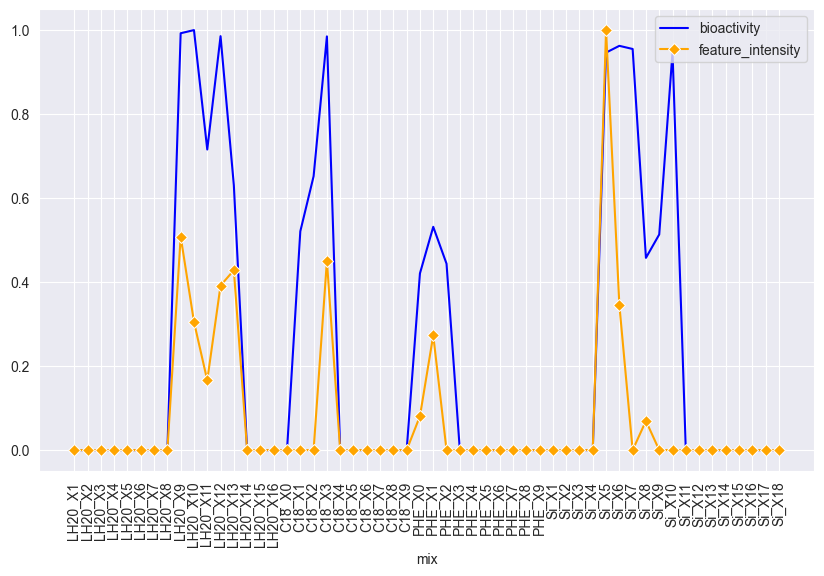

In [43]:
correlation_result_temp
idx = 43
instance = correlation_result_temp.loc[idx]
fig, axs = plt.subplots(figsize=(10, 6))
sns.lineplot(x=bio_data_processed['mix'],
             y=[x / bio_data_processed['average_adjusted'].max() for x in bio_data_processed['average_adjusted']],
             color='blue', label='bioactivity')
sns.lineplot(x=bio_data_processed['mix'], y=[x / correlation_result_temp.loc[idx][mix_name_pos].max() for x in
                                             correlation_result_temp.loc[idx][mix_name_pos]], color='orange', marker='D',
             label='feature_intensity')
plt.legend(loc='upper right')
# plt.legend()
# plt.vlines(x = 7, ymin = 0, ymax = 1, colors='green')
# plt.vlines(x = 10, ymin = 0, ymax = 1,colors='green')
plt.xticks(rotation=90)
plt.show()
# plt.savefig(os.path.join(additional_figure_dir, str(instance['rank']) + '_' + str(instance['pmz']) + '_' + str(
#     np.round(instance['rt'], 3)) + '.png'))

In [45]:
feature_temp

,PeakID,Title,Scans,RT left(min),RT_adjusted,RT (min),RT right (min),Precursor m/z,Height,Area,...,m/z matched,MS/MS matched,RT similarity,Dot product,Reverse dot product,Fragment presence %,Total score,S/N,MS1 isotopes,MSMS spectrum
3318,3318,Unknown,12834,1.792827,2.021039,2.033488,2.119664,606.0562,155912.578125,1437177.75,...,False,False,NaN,NaN,NaN,NaN,NaN,2978.586,605.99214:0 606.00015:0 606.00816:0 606.05621:...,NaN


# below is assuming different compound in different columns

In [115]:
picked= []
correlation_result = {}
for index, row in active_fractions.iterrows():
    if active_fractions.loc[index]['mix'] not in picked:
        peak_idx = index
        left_edge, right_edge = find_edge(bio_data_processed['average_adjusted'], peak_idx=index)
        picked.extend(bio_data_processed['mix'][left_edge:right_edge+1])
        activity_temp = list(np.repeat(0, len(bio_data_processed)))
        activity_temp[left_edge:right_edge+1]=bio_data_processed['average_adjusted'][left_edge:right_edge+1]
        correlation = []
        p_values = []
        for index, row in alignment_fractions.iterrows():
            temp = (pearsonr(row.values, activity_temp))
            if temp[0]!=temp[0]: # this is nan
                correlation.append(0)
                p_values.append(0)
            else:
                correlation.append(temp[0])
                p_values.append(temp[1])
        correlation_result_temp = alignment_mzrt.copy()
        correlation_result_temp['pearson'] = correlation
        correlation_result_temp['p_values']=p_values
        correlation_result[bio_data_processed['mix'].iloc[index]]=correlation_result_temp

        # print(left_edge, right_edge)
        # for i in range(left_edge,right_edge+1):
        #     activity_temp[i]=bio_data_processed['average_adjusted'][i]
        break
        # print(left_edge, right_edge)
        # break
    # break

IndexError: single positional indexer is out-of-bounds

In [119]:
correlation_result_temp.sort_values(by = ['pearson'], ascending=False, inplace=True)

In [1]:
correlation_result_temp

NameError: name 'correlation_result_temp' is not defined

In [77]:
595.0818-((279.0708-single_charged_adduct_mass['[M+H]+'])*2+38.963158)

-0.008406000000036329

In [105]:
279.0708-single_charged_adduct_mass['[M+H]+']

278.06352400000003

In [78]:
(279.0708-single_charged_adduct_mass['[M+H]+'])*2+single_charged_adduct_mass['[M+Na]+']

579.1162660000001

In [76]:
279.0708-single_charged_adduct_mass['[M+H]+']

278.06352400000003

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


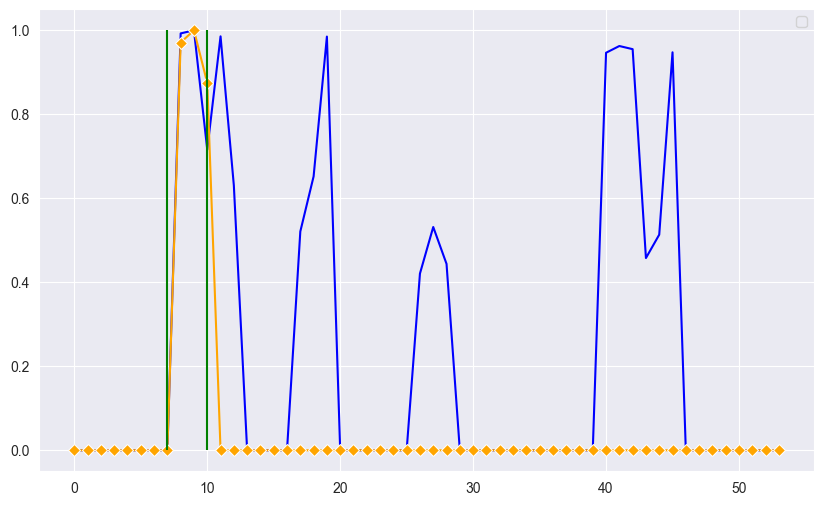

In [145]:
idx = 18341
fig, axs = plt.subplots(figsize = (10,6))
sns.lineplot(x =  np.arange(len(bio_data_processed)), y = [x/bio_data_processed['average_adjusted'].max() for x in bio_data_processed['average_adjusted']], color = 'blue')
sns.lineplot(x =  np.arange(len(bio_data_processed)), y = [x/alignment_istd_cleaned.loc[idx][mix_name_pos].max() for x in alignment_istd_cleaned.loc[idx][mix_name_pos]], color = 'orange', marker = 'D')

# plt.legend()
plt.vlines(x = 7, ymin = 0, ymax = 1, colors='green')
plt.vlines(x = 10, ymin = 0, ymax = 1,colors='green')
# plt.xticks(rotation = 90)
plt.show()